## TODO

0 - Debugar problema de ínidice fora de limite ao trocar o número de gerações


1 - Testar a RCE com rastringin (10 variáveis float, limites -5,12 a +5,12, minimização), usando AG com crossover (dois pontos) 0,90; mutação (gaussiana) 0,05; 400 gerações; 100 indivíduos na população; seleção por torneio com 3 indivíduos; elitismo simples entre gerações; exercitando parâmetros do JSON. Para fazer isso, seguir os passsos:

a - Para cada grupo de parãmetros executar n (20) vezes o algoritmo e registrar melhor, média e desvio padrão do fitness da solução final de todas as execuções. Para a solução melhor, apresentar também a geração em que a solução é obtida e as variáveis de decisão com três casas decimais (que é a solução do problema, propriamente dito).

b - Limpar a saída para apresentar apenas : best fitness, best variables, best generation e gráfico do processo evolutivo.


frc2 - Para o relatório: Gerar tabela com estes resultados para cada grupo de parâmetros. Parâmetros a variar (se precisar aumentar ou diminuir os valores pode fazer - testar sensibilidade):
a - crossover - 0,20 ; 0,40; 0,60; 0,90
b - RCE - percentual (30% - 3000% - 10000%)
c - RCE - num var diff (1 - 3 - 6 - 9)
d - RCE - valor limite (0,1 - 0,5 - 2 - 5)
e - RCE - geraçoes para executar (5%, 10%, 20%, 50%)


3 - Para a próxima reunião, faremos uma análise de todos os resultados nas tabelas para testar com um setup dos melhores parâmetros encontrados.

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


caminho_arquivos = "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/output/results"
df = pd.read_excel(f"{caminho_arquivos}/resultado_RCE_1.xlsx")
df


def stringArrayToList():

    valores = df["Variaveis Decisão"].values
    array = []
    array_near_zero = []

    # Iterate through each value (assuming each value is a string representation of a list)
    for value_str in valores:
        try:
            # Remove leading and trailing brackets (if present)
            value_str = value_str.strip("[]")

            # Convert string to a list of floats
            value_list = [float(item) for item in value_str.split(",")]

            # Add the converted list to the array
            array.extend(value_list)  # Use extend for appending multiple values
        except ValueError:
            # Handle conversion errors (optional)
            print(f"Warning: Failed to convert '{value_str}' to float list. Skipping.")

    # Print the resulting array of numerical values
    print(array)

    for value in array:
        if abs(value) <= 0.06:
            array_near_zero.append(value)

    return array_near_zero

In [18]:
def ler_e_concatenar_excel(caminho_arquivos):
    df_final = pd.DataFrame()

    for arquivo in caminho_arquivos:
        df_temp = pd.read_excel(arquivo)
        # Ajustar o index para evitar duplicatas
        df_temp.index += len(df_final)
        df_final = pd.concat([df_final, df_temp], ignore_index=True)

    return df_final


numero_arquivos = 20  # Ajuste o número de arquivos

# Criar lista de caminhos de arquivo
lista_arquivos = []
for i in range(1, numero_arquivos + 1):
    nome_arquivo = f"resultado_RCE_{i}.xlsx"
    caminho_arquivo = os.path.join(caminho_arquivos, nome_arquivo)
    lista_arquivos.append(caminho_arquivo)

# Ler e concatenar os arquivos
df_consolidado = ler_e_concatenar_excel(lista_arquivos)
# Exibir o DataFrame consolidado
display(df_consolidado)
df_consolidado.to_excel(
    "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/output/resultado consolidado/resultado_consolidado.xlsx",
    index=False,
)

,Resultado,Best Fitness Value,Media Fitness,Desvio Padrão,Variaveis Decisão,Solution Generation,Crossover,Mutação do Individuo,Percentual apply rce,Num Var Diferença,Delta,RCE Num Generations,otimização
0,1,0.027655,26.734635,21.244858,"[-0.012, -0.001, 0.523, 2.904, 1.228, -2.741, ...",92,0.6,0.15,30,1,0.5,50,rastrigin
1,2,0.180515,14.383042,20.777239,"[0.03, 0.002, 4.272, -4.09, -1.515, 4.059, -1....",46,0.6,0.15,30,1,0.5,50,rastrigin
2,3,0.000065,24.759877,22.575058,"[0.0, -0.0, -0.569, -4.405, 3.336, 4.803, -3.3...",95,0.6,0.15,30,1,0.5,50,rastrigin
3,4,0.002727,13.002520,19.737201,"[-0.0, 0.004, -5.729, -3.753, 1.722, -4.106, 0...",85,0.6,0.15,30,1,0.5,50,rastrigin
4,5,0.019689,10.979959,18.186207,"[0.006, 0.008, -0.417, -1.912, -2.184, 2.572, ...",58,0.6,0.15,30,1,0.5,50,rastrigin
5,6,0.045220,4.776284,12.669817,"[0.015, 0.003, 5.454, 0.469, -0.404, -3.453, 3...",98,0.6,0.15,30,1,0.5,50,rastrigin
6,7,0.083202,24.420510,19.701296,"[0.013, 0.016, -1.978, 4.768, 0.345, -4.856, 0...",78,0.6,0.15,30,1,0.5,50,rastrigin
7,8,0.152796,9.814724,16.999733,"[0.003, 0.028, 3.802, 3.873, -3.98, 1.412, 2.0...",52,0.6,0.15,30,1,0.5,50,rastrigin
8,9,0.000373,16.763357,21.004025,"[-0.001, 0.001, -1.716, 1.25, -2.615, 4.736, -...",67,0.6,0.15,30,1,0.5,50,rastrigin
9,10,0.013767,12.258698,19.078237,"[-0.002, 0.008, -5.011, 0.894, 0.07, -0.65, -3...",46,0.6,0.15,30,1,0.5,50,rastrigin


## Dash

In [19]:
import pandas as pd
import openpyxl
import seaborn as sns
from openpyxl.styles import PatternFill, Font
import json

def load_params(file_path):
    with open(file_path, "r") as file:
        params = json.load(file)
    return params  
# Setup


params = load_params(
    r"/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/db/parameters.json"
)

from openpyxl.styles import PatternFill, Font


class ExcelManager:
    def __init__(self, path):
        self.path = path
        self.wb = openpyxl.load_workbook(self.path)
        self.ws = self.wb.active

    def create(self, name):
        self.wb.create_sheet(name)

    def save(self):
        self.wb.save(self.path)

    def remove(self, sheet):
        self.wb.remove(self.wb[sheet])

    def add_values(self, sheet_name, resumo):
        planilha = self.wb[sheet_name]

        parametros = "A"

        valores = "B"

        tabela = "C"

        resumo_cv = "D"
        print(params)
        self.ws[f"{parametros}1"] = "Parametros Evolutivos"
        self.ws[f"{parametros}2"] = params["CROSSOVER"]
        self.ws[f"{parametros}3"] = params["MUTACAO"]
        self.ws[f"{parametros}4"] = params["NUM_GENERATIONS"]

        self.ws[f"{valores}1"] = "Valores Estatisticos"
        self.ws[f"{valores}2"] = "Min"
        self.ws[f"{valores}3"] = "Media"
        self.ws[f"{valores}4"] = "Max"

        self.ws[f"{tabela}4"] = "Best Fitness Value"
        self.ws[f"{tabela}4"] = resumo["Min best fitness"]
        self.ws[f"{tabela}4"] = resumo["Media best Fitness values"]
        self.ws[f"{tabela}4"] = resumo["Max best Fitness"]

        self.ws[f"{resumo_cv}1"] = "Media Fitness"
        self.ws[f"{resumo_cv}1"] = resumo["Media Fitness"]
        self.ws[f"{resumo_cv}1"] = resumo["STD Fitness"]
        self.ws[f"{resumo_cv}1"] = resumo["CV"]

        self.criar_tabela(sheet_name, df_consolidado)

        self.wb.save(self.path)

    def criar_tabela(self, sheet_name, df):
        df_consolidado.to_html("./dash")
        df = df_consolidado.to_dict()
        planilha = self.wb[sheet_name]
        print(planilha)
        # self.ws["E1"] = df

    def formata_excel(self, dicionario):
        for item in dicionario:
            celula = self.ws.cell(row=item["key"], column=1)
            celula.value = item["valor"]
            celula.fill = PatternFill(
                start_color="FFFF0000", end_color="FFFF0000", fill_type="solid"
            )
            celula.font = Font(color="FFFFFFFF")

        self.wb.save(self.path)


class AnaliseColuna:
    def __init__(self, df, coluna):
        self.df = df
        self.coluna = coluna

    def calcula_estatisticas(self):
        """Calcula a média, mínimo e máximo da coluna especificada."""
        calculo_media = self.df[self.coluna].mean()
        calculo_min = self.df[self.coluna].min()
        calculo_max = self.df[self.coluna].max()

        # print(f"Média da coluna '{self.coluna}': {calculo_media}")
        # print(f"Mínimo da coluna '{self.coluna}': {calculo_min}")
        # print(f"Máximo da coluna '{self.coluna}': {calculo_max}")

        return calculo_min, calculo_media, calculo_max

    def formata_excel(self, arquivo_excel, dicionario):

        # criar o arquivo se nao existir
        self.df.to_excel(
            f"/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/output/resultado consolidado/{arquivo_excel}",
            index=False,
        )

        """Formata o arquivo Excel com as estatísticas em vermelho."""
        pathGlobal = f"/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/output/resultado consolidado/{arquivo_excel}"
        wb = openpyxl.load_workbook(pathGlobal)
        ws = wb.active

        for item in dicionario:
            celula = ws.cell(row=item["key"], column=1)
            celula.value = item["valor"]
            celula.fill = PatternFill(
                start_color="FFFF0000", end_color="FFFF0000", fill_type="solid"
            )
            celula.font = Font(color="FFFFFFFF")

        wb.save(pathGlobal)


def main():

    analise = AnaliseColuna(df_consolidado, "Best Fitness Value")
    calculo_min, calculo_media, calculo_max = analise.calcula_estatisticas()
    media_median = df_consolidado["Media Fitness"].mean()
    # print("\nFitness mean = ",media_median)

    media_std = df_consolidado["Desvio Padrão"].mean()
    # print("STD medio", media_std)

    cv = (media_median/media_std)

    # print("CV = ", round(cv * 100,2), "%")

    dicionario = [
        {"key": 1, "valor": "Coluna1"},
        {"key": 2, "valor": calculo_min},
        {"key": 3, "valor": calculo_media},
        {"key": 4, "valor": calculo_max},
    ]

    resumo = {
        "Min best fitness": calculo_min,
        "Media best Fitness values": calculo_media,
        "Max best Fitness": calculo_max,
        "Media Fitness": media_median,
        "STD Fitness": media_std,
        "CV": round(cv * 100,2)

    }
    # df_tabelaResumo = pd.DataFrame(data= resumo)
    analise.formata_excel("resultado_calculado.xlsx", dicionario)
    display(resumo)

    # Criando o DataFrame
    df_resumo = pd.DataFrame([resumo])

    # Exibindo o DataFrame
    display(df_resumo)
    df_resumo.to_excel(
        "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/output/resultado consolidado/tabela_resumo.xlsx"
    )
    # Exibir o DataFrame consolidado
    display(df_consolidado)
    df_consolidado.to_excel(
        "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/output/resultado consolidado/resultado_consolidado.xlsx",
        index=False,
    )

    # excel = ExcelManager(
    #    "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/output/resultado consolidado/planilha_RCE.xlsx"
    # )

    # excel.add_values("Planilha1", resumo)


APAGAR = True

if __name__ == "__main__":

    print("Resultados obitidos 24/07 ")
    main()
    df_params = pd.DataFrame([params])
    display(df_params)

Resultados obitidos 24/07 


{'Min best fitness': np.float64(6.537576981102688e-05),
 'Media best Fitness values': np.float64(0.07090239856820775),
 'Max best Fitness': np.float64(0.4080665883277739),
 'Media Fitness': np.float64(16.142532891352893),
 'STD Fitness': np.float64(19.628214855187313),
 'CV': np.float64(82.24)}

,Min best fitness,Media best Fitness values,Max best Fitness,Media Fitness,STD Fitness,CV
0,0.000065,0.070902,0.408067,16.142533,19.628215,82.24


,Resultado,Best Fitness Value,Media Fitness,Desvio Padrão,Variaveis Decisão,Solution Generation,Crossover,Mutação do Individuo,Percentual apply rce,Num Var Diferença,Delta,RCE Num Generations,otimização
0,1,0.027655,26.734635,21.244858,"[-0.012, -0.001, 0.523, 2.904, 1.228, -2.741, ...",92,0.6,0.15,30,1,0.5,50,rastrigin
1,2,0.180515,14.383042,20.777239,"[0.03, 0.002, 4.272, -4.09, -1.515, 4.059, -1....",46,0.6,0.15,30,1,0.5,50,rastrigin
2,3,0.000065,24.759877,22.575058,"[0.0, -0.0, -0.569, -4.405, 3.336, 4.803, -3.3...",95,0.6,0.15,30,1,0.5,50,rastrigin
3,4,0.002727,13.002520,19.737201,"[-0.0, 0.004, -5.729, -3.753, 1.722, -4.106, 0...",85,0.6,0.15,30,1,0.5,50,rastrigin
4,5,0.019689,10.979959,18.186207,"[0.006, 0.008, -0.417, -1.912, -2.184, 2.572, ...",58,0.6,0.15,30,1,0.5,50,rastrigin
5,6,0.045220,4.776284,12.669817,"[0.015, 0.003, 5.454, 0.469, -0.404, -3.453, 3...",98,0.6,0.15,30,1,0.5,50,rastrigin
6,7,0.083202,24.420510,19.701296,"[0.013, 0.016, -1.978, 4.768, 0.345, -4.856, 0...",78,0.6,0.15,30,1,0.5,50,rastrigin
7,8,0.152796,9.814724,16.999733,"[0.003, 0.028, 3.802, 3.873, -3.98, 1.412, 2.0...",52,0.6,0.15,30,1,0.5,50,rastrigin
8,9,0.000373,16.763357,21.004025,"[-0.001, 0.001, -1.716, 1.25, -2.615, 4.736, -...",67,0.6,0.15,30,1,0.5,50,rastrigin
9,10,0.013767,12.258698,19.078237,"[-0.002, 0.008, -5.011, 0.894, 0.07, -0.65, -3...",46,0.6,0.15,30,1,0.5,50,rastrigin


,type,CROSSOVER,MUTACAO,NUM_GENERATIONS,POP_SIZE,IND_SIZE,funcao objetivo,RCE_REPOPULATION_GENERATIONS,NUM_VAR_DIFERENTES,PORCENTAGEM,VALOR_LIMITE
0,rastrigin,0.6,0.15,100,100,10,rastrigin,50,1,30,0.5


In [20]:
df_consolidado.describe()

,Resultado,Best Fitness Value,Media Fitness,Desvio Padrão,Solution Generation,Crossover,Mutação do Individuo,Percentual apply rce,Num Var Diferença,Delta,RCE Num Generations
count,20.00000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20.0,20.0,20.0,20.0
mean,10.50000,0.070902,16.142533,19.628215,70.500000,6.000000e-01,1.500000e-01,30.0,1.0,0.5,50.0
std,5.91608,0.101865,6.905249,2.167408,19.019381,1.139065e-16,2.847662e-17,0.0,0.0,0.0,0.0
min,1.00000,0.000065,4.776284,12.669817,39.000000,6.000000e-01,1.500000e-01,30.0,1.0,0.5,50.0
25%,5.75000,0.013445,10.988543,19.062164,56.500000,6.000000e-01,1.500000e-01,30.0,1.0,0.5,50.0
50%,10.50000,0.027198,12.760775,19.821990,71.500000,6.000000e-01,1.500000e-01,30.0,1.0,0.5,50.0
75%,15.25000,0.076603,23.945782,20.856778,85.750000,6.000000e-01,1.500000e-01,30.0,1.0,0.5,50.0
max,20.00000,0.408067,26.734635,22.575058,98.000000,6.000000e-01,1.500000e-01,30.0,1.0,0.5,50.0


## Gerando tabelas  e resultados

In [21]:
# Exibindo o DataFrame
diretorio = "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/views/tabelas"
output_path = "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/output"
df_resumo = pd.read_excel(f"{output_path}/resultado consolidado/tabela_resumo.xlsx")
try_results = pd.concat([df_params, df_consolidado, df_resumo], ignore_index=True)
try_results.to_excel(f"{output_path}/evolutivo_consolidado_resumo.xlsx")

df_params.to_excel(f"{diretorio}/parametros_evolutivos.xlsx", index=False)
df_consolidado.to_excel(f"{diretorio}/tabela_consolidada.xlsx", index=False)
df_resumo.to_excel(f"{diretorio}/tabela_resumo.xlsx", index=False)

In [22]:
if APAGAR:
    # os.remove("./src/assets/output/resultado consolidado/resultado_calculado.xlsx")
    pasta = "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/output/results"
    # apagar todos xlsx de uma pasta
    for file in os.listdir(pasta):
        if file.endswith(".xlsx"):
            os.remove(os.path.join(pasta, file))
    print("Arquivos apagados!!!")

Arquivos apagados!!!


gen	nevals	avg    	std      	min    	max    
0  	100   	9.93462	0.0805386	9.52378	9.98216
1  	76    	9.87991	0.121946 	9.52378	9.98184
2  	87    	nan    	nan      	nan    	nan    
3  	76    	nan    	nan      	nan    	nan    
4  	71    	nan    	nan      	nan    	nan    
5  	80    	nan    	nan      	nan    	nan    
6  	85    	nan    	nan      	nan    	nan    
7  	80    	nan    	nan      	nan    	nan    
8  	71    	nan    	nan      	nan    	nan    
9  	66    	nan    	nan      	nan    	nan    
10 	93    	nan    	nan      	nan    	nan    
11 	81    	nan    	nan      	nan    	nan    
12 	84    	nan    	nan      	nan    	nan    
13 	76    	nan    	nan      	nan    	nan    
14 	81    	nan    	nan      	nan    	nan    
15 	73    	nan    	nan      	nan    	nan    
16 	84    	nan    	nan      	nan    	nan    
17 	84    	nan    	nan      	nan    	nan    
18 	76    	nan    	nan      	nan    	nan    
19 	73    	nan    	nan      	nan    	nan    
20 	67    	nan    	nan      	nan    	nan    
21 	79    

/home/pedrov/.local/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/pedrov/.local/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/tmp/ipykernel_152266/2337681738.py:22: RuntimeWarning: invalid value encountered in sqrt
  return 1 / (2 * np.pi * np.sqrt(self.L * self.C))


39 	79    	nan    	nan      	nan    	nan    
40 	82    	nan    	nan      	nan    	nan    
41 	76    	nan    	nan      	nan    	nan    
42 	72    	nan    	nan      	nan    	nan    
43 	75    	nan    	nan      	nan    	nan    
44 	71    	nan    	nan      	nan    	nan    
45 	65    	nan    	nan      	nan    	nan    
46 	69    	nan    	nan      	nan    	nan    
47 	78    	nan    	nan      	nan    	nan    
48 	77    	nan    	nan      	nan    	nan    
49 	78    	nan    	nan      	nan    	nan    
50 	82    	nan    	nan      	nan    	nan    
51 	78    	nan    	nan      	nan    	nan    
52 	67    	nan    	nan      	nan    	nan    
53 	73    	nan    	nan      	nan    	nan    
54 	61    	nan    	nan      	nan    	nan    
55 	86    	nan    	nan      	nan    	nan    
56 	78    	nan    	nan      	nan    	nan    
57 	76    	nan    	nan      	nan    	nan    
58 	74    	nan    	nan      	nan    	nan    
59 	76    	nan    	nan      	nan    	nan    
60 	82    	nan    	nan      	nan    	nan    
61 	82    

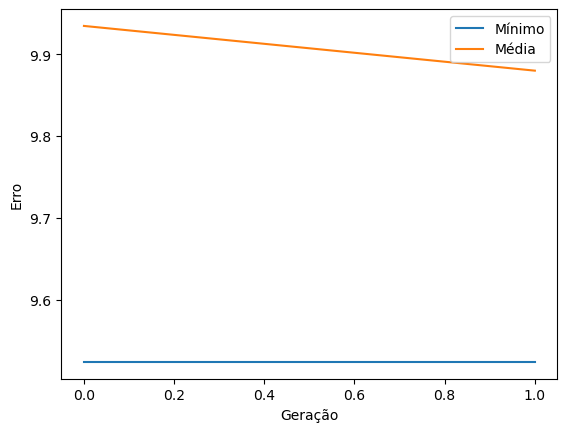

Melhor indivíduo: C=0.03, L=0.71, R=7.10, f_ressonancia=1.05


In [23]:
import numpy as np
import pandas as pd
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import json


class CircuitoRLC:
    """
    Classe para representar um circuito RLC.
    """

    def __init__(self, C, L, R):
        self.C = C
        self.L = L
        self.R = R

    def calcular_frequencia_ressonancia(self):
        """
        Calcula a frequência de ressonância do circuito.
        """
        return 1 / (2 * np.pi * np.sqrt(self.L * self.C))


class OtimizadorCircuitoRLC:
    """
    Classe para otimizar um circuito RLC usando algoritmos evolutivos.
    """

    def __init__(
        self,
        f_desejada,
        intervalo_componentes=(0.01, 10.0),
        n_geracoes=100,
        n_individuos=100,
    ):
        self.f_desejada = f_desejada
        self.intervalo_componentes = intervalo_componentes
        self.n_geracoes = n_geracoes
        self.n_individuos = n_individuos

        # Configurando o DEAP
        creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
        creator.create("Individuo", list, fitness=creator.FitnessMin)
        self.toolbox = base.Toolbox()
        self.toolbox.register(
            "attr_float", np.random.uniform, *self.intervalo_componentes
        )
        self.toolbox.register(
            "individuo", tools.initRepeat, creator.Individuo, self.toolbox.attr_float, 3
        )
        self.toolbox.register(
            "populacao", tools.initRepeat, list, self.toolbox.individuo
        )
        self.toolbox.register("evaluate", self.funcao_objetivo)
        self.toolbox.register("mate", tools.cxTwoPoint)

        self.toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)

        self.toolbox.register("select", tools.selTournament, tournsize=3)

    def funcao_objetivo(self, individuo):
        """
        Função objetivo para minimizar o erro entre a frequência de ressonância e a frequência desejada.
        """
        C, L, R = individuo
        circuito = CircuitoRLC(C, L, R)
        f_ressonancia = circuito.calcular_frequencia_ressonancia()
        erro = abs(f_ressonancia - self.f_desejada)
        return (erro,)

    def otimizar(self):
        """
        Executa o algoritmo evolutivo para otimizar o circuito.
        """
        populacao = self.toolbox.populacao(n=self.n_individuos)
        hof = tools.HallOfFame(1)
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("std", np.std)
        stats.register("min", np.min)
        stats.register("max", np.max)
        populacao, logbook = algorithms.eaSimple(
            populacao,
            self.toolbox,
            cxpb=0.7,
            mutpb=0.3,
            ngen=self.n_geracoes,
            stats=stats,
            halloffame=hof,
            verbose=True,
        )
        return populacao, logbook, hof

    def visualizar_resultados(self, logbook, hof):
        """
        Visualiza os resultados da otimização.
        """
        plt.figure()
        plt.plot(logbook.select("min"), label="Mínimo")
        plt.plot(logbook.select("avg"), label="Média")
        plt.xlabel("Geração")
        plt.ylabel("Erro")
        plt.legend()
        plt.show()

        melhor_individuo = hof[0]
        melhor_C, melhor_L, melhor_R = melhor_individuo
        melhor_f_ressonancia = CircuitoRLC(
            melhor_C, melhor_L, melhor_R
        ).calcular_frequencia_ressonancia()
        print(
            f"Melhor indivíduo: C={melhor_C:.2f}, L={melhor_L:.2f}, R={melhor_R:.2f}, f_ressonancia={melhor_f_ressonancia:.2f}"
        )

    def salvar_resultados(self, hof):
        """
        Salva os resultados da otimização em um arquivo JSON.
        """
        melhor_individuo = hof[0]
        melhor_individuo_json = {
            "C": melhor_individuo[0],
            "L": melhor_individuo[1],
            "R": melhor_individuo[2],
        }
        with open("melhor_individuo.json", "w") as f:
            json.dump(melhor_individuo_json, f)


# Carregando dados de entrada (JSON)
#df_componentes = pd.read_json(
#    "componentes.json"
#)  # Assuma que "componentes.json" existe

# Configurando o otimizador
f_desejada = 10.0  # Frequência desejada em Hz (exemplo)
otimizador = OtimizadorCircuitoRLC(f_desejada)

# Executando a otimização
populacao, logbook, hof = otimizador.otimizar()

# Visualizando os resultados
otimizador.visualizar_resultados(logbook, hof)

# Salvando os resultados
otimizador.salvar_resultados(hof)

# pare com viciios
---

## TENTATIVA

In [24]:
import pandas as pd
import openpyxl


def combinar_dataframes_excel(dataframes, arquivo_excel):
    """
    Combina um array de DataFrames em uma única planilha Excel,
    separando-os por duas linhas em branco e alinhando pelas colunas.

    Args:
      dataframes: Um array de DataFrames.
      arquivo_excel: O nome do arquivo Excel a ser criado.
    """

    # Criar um Writer para o arquivo Excel
    writer = pd.ExcelWriter(arquivo_excel, engine="openpyxl")

    # Obter o objeto Workbook do Writer
    workbook = writer.book
    worksheet = workbook[
        "Sheet1"
    ]  # Assumindo que o primeiro DataFrame será escrito na aba 'Sheet1'

    # Escrever os DataFrames em sequência, com separação de linhas
    start_row = 1  # Começar na linha 1
    for i, df in enumerate(dataframes):
        df.to_excel(
            writer, sheet_name="Sheet1", index=False, startrow=start_row, header=False
        )
        start_row += df.shape[0] + 2  # Adicionar 2 linhas em branco

    # Salvar o arquivo Excel
    writer.save()


# Exemplo de uso
df1 = pd.DataFrame({"Coluna 1": [1, 2, 3], "Coluna 2": ["A", "B", "C"]})
df2 = pd.DataFrame({"Coluna 3": [4, 5, 6], "Coluna 4": ["D", "E", "F"]})
df3 = pd.DataFrame({"Coluna 5": [7, 8, 9], "Coluna 6": ["G", "H", "I"]})

dataframes = [df1, df2, df3]

combinador = ExcelCombiner()
combinador.combinar_dataframes(dataframes, "dataframes_combinados.xlsx")

# Carregar o arquivo JSON com os parâmetros
with open("params.json", "r") as f:
    params = json.load(f)

# Converter o dicionário de parâmetros para um DataFrame
df_params = pd.DataFrame([params])

# DataFrame consolidado (substitua pelos seus dados reais)
df_consolidado = pd.DataFrame(
    [
        [
            "Resultado",
            "Best Fitness Value",
            "Media Fitness",
            "Desvio Padrão",
            "Variaveis Decisão",
            "Solution Generation",
            "Crossover",
            "Mutação do Individuo",
            "Percentual apply rce",
            "Num Var Diferença",
            "Delta",
            "RCE Num Generations",
            "otimização",
        ]
    ]
    + [
        [
            i + 1,
            row["Best Fitness Value"],
            row["Media Fitness"],
            row["Desvio Padrão"],
            row["Variaveis Decisão"],
            row["Solution Generation"],
            row["Crossover"],
            row["Mutação do Individuo"],
            row["Percentual apply rce"],
            row["Num Var Diferença"],
            row["Delta"],
            row["RCE Num Generations"],
            row["otimização"],
        ]
        for i, row in df_consolidado.iterrows()
    ]
)
CAMINHO = "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/output/resultado consolidado/planilha_RCE.xlsx"

# Criar um objeto ExcelCombiner
combinador = ExcelCombiner()

# Caminho do arquivo Excel

# Combinar os DataFrames no arquivo Excel
combinador.combinar_dataframes([df_params, df_consolidado, df3], CAMINHO)

NameError: name 'ExcelCombiner' is not defined

{'type': 'rastrigin',
 'CROSSOVER': 0.2,
 'MUTACAO': 0.01,
 'NUM_GENERATIONS': 100,
 'POP_SIZE': 100,
 'IND_SIZE': 10,
 'funcao objetivo': 'Rastrigin',
 'RCE_REPOPULATION_GENERATIONS': 20,
 'NUM_VAR_DIFERENTES': 1,
 'PORCENTAGEM': 30,
 'VALOR_LIMITE': 5}

,Resultado,Best Fitness Value,Media Fitness,Desvio Padrão,Variaveis Decisão,Solution Generation,Crossover,Mutação do Individuo,Percentual apply rce,Num Var Diferença,Delta,RCE Num Generations,otimização
0,1,29.206280,29.223630,1.726280e-01,"[-0.041, 0.861, -0.05, -0.019, -2.047, 1.961, ...",63,0.2,0.01,30,1,5,20,rastrigin
1,2,19.541879,19.888552,2.439384e+00,"[-1.989, -0.839, 1.016, -0.111, 0.992, 0.005, ...",84,0.2,0.01,30,1,5,20,rastrigin
2,3,27.707484,28.836519,1.612907e-01,"[0.159, 0.038, 1.023, 0.006, 0.13, -1.948, -2....",99,0.2,0.01,30,1,5,20,rastrigin
3,4,31.482211,31.494965,1.269010e-01,"[-0.044, -2.039, 0.193, -1.079, 2.063, -0.934,...",80,0.2,0.01,30,1,5,20,rastrigin
4,5,42.587598,42.811219,2.224999e+00,"[-0.058, 0.978, 0.097, 3.053, -0.028, 0.06, -0...",88,0.2,0.01,30,1,5,20,rastrigin
5,6,41.163504,48.381314,1.473329e+00,"[2.076, 0.058, 2.921, 0.997, -0.115, 0.09, -0....",98,0.2,0.01,30,1,5,20,rastrigin
6,7,33.930664,33.969237,3.837984e-01,"[0.074, 1.058, -1.094, -0.919, -2.96, 0.858, 0...",91,0.2,0.01,30,1,5,20,rastrigin
7,8,46.261834,46.261834,1.421085e-14,"[0.959, 0.935, -1.073, -3.973, -0.954, 4.031, ...",71,0.2,0.01,30,1,5,20,rastrigin
8,9,51.875106,52.166114,2.158374e+00,"[2.918, -0.073, 2.858, 1.996, 0.059, 1.941, 1....",77,0.2,0.01,30,1,5,20,rastrigin
9,10,38.074926,38.323455,2.472823e+00,"[-0.017, -0.047, 0.978, -0.989, 4.116, 2.906, ...",78,0.2,0.01,30,1,5,20,rastrigin


,Unnamed: 0,Min best fitness,Media best Fitness values,Max best Fitness,Media Fitness,STD Fitness,CV
0,0,19.541879,34.088187,51.875106,34.972674,1.261459,2772.4


KeyError: 'Worksheet Planilha1 does not exist.'

## Analises

In [ ]:
from functools import reduce


def encontrar_repetidos_ou_espelhados(array):
    """
    Função que utiliza reduce para encontrar resultados repetidos ou espelhados
    em um array.

    Args:
      array: O array de entrada.
      num_var: O valor a ser buscado no array.

    Returns:
      Uma lista com os resultados repetidos ou espelhados.
    """

    def combinar(resultados, valor):
        num_var = array[0]  # Defina o valor a ser buscado

        """Função auxiliar para usar com reduce."""
        if valor == num_var or valor == -num_var:
            resultados.append(valor)
        return resultados

    return reduce(combinar, array, [])


# Exemplo de uso:
array = [0.005, -0.017, -0.005, -0.002, 0.993, 0.005, 0.044, -0.007, 0.005, 0.04]
resultados = encontrar_repetidos_ou_espelhados(array)

print(f"Resultados repetidos ou espelhados para {len(resultados)}: {resultados}")

Resultados repetidos ou espelhados para 4: [0.005, -0.005, 0.005, 0.005]


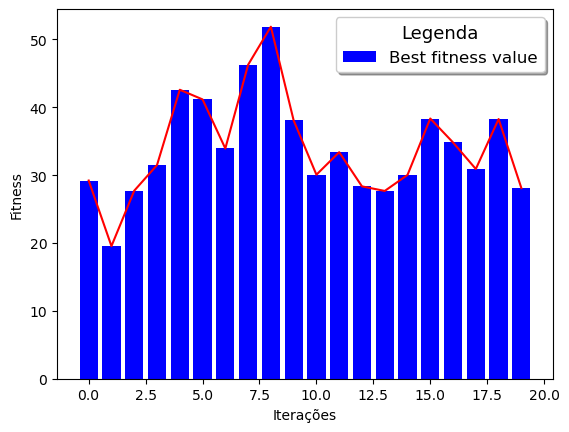

In [ ]:


class Analise:
    def __init__(self) -> None:
        pass

    def calcula(self,df):
        #media coluna Best Fitness Value,Media Fitness, Media Desvio Padrão
                
        print("Media = ")


df_consolidado = pd.read_excel("./src/assets/output/resultado consolidado/resultado_consolidado.xlsx")

plt.plot(df_consolidado["Best Fitness Value"], color="red")

plt.xlabel("Iterações")
plt.ylabel("Fitness")


plt.bar(
    df_consolidado["Resultado"] - 1,
    df_consolidado["Best Fitness Value"],
    color="blue",
    label="Best fitness value",
)
plt.legend(
    title="Legenda",
    title_fontsize="13",
    loc="upper right",
    fontsize="12",
    shadow=True,
    facecolor="white",
)

plt.show()

[-0.041, 0.861, -0.05, -0.019, -2.047, 1.961, -1.043, -2.883, -0.072, 0.927]


/tmp/ipykernel_44818/1627336378.py:7: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(


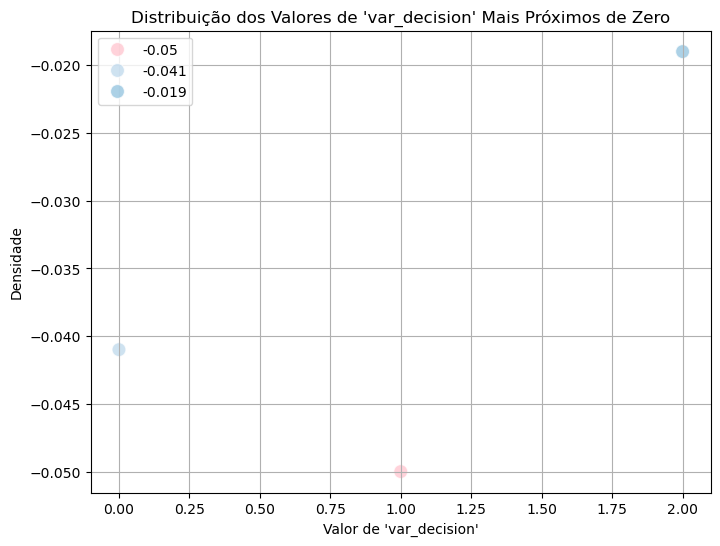

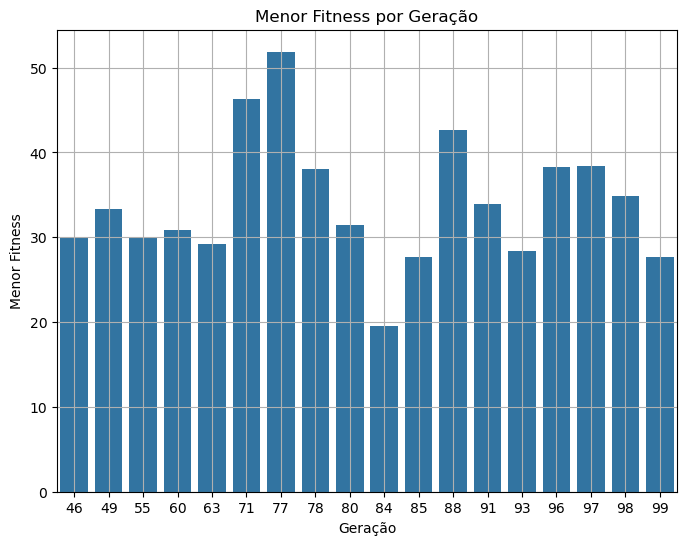

In [ ]:
var_decision_near_zero = stringArrayToList()

plt.figure(figsize=(8, 6))
cmap = sns.color_palette("Blues",)  # Create a red color palette with 2 colors
cmap[0] = "pink"  # Assign red to the first color (value 0)
# Generate the scatterplot with hue and custom color map
sns.scatterplot(
    x=range(len(var_decision_near_zero)),
    y=var_decision_near_zero,
    hue=var_decision_near_zero,
    palette=cmap,
    s=100,  # Adjust marker size as needed
    alpha=0.7,  # Adjust marker transparency as needed
)
plt.title("Distribuição dos Valores de 'var_decision' Mais Próximos de Zero")
plt.xlabel("Valor de 'var_decision'")
plt.ylabel("Densidade")
plt.grid(True)
plt.show()

# 3. Bar plot of lowest fitness values by generation
lowest_fitness_by_gen = df_consolidado.groupby("Solution Generation")[
    "Best Fitness Value"
].min()
plt.figure(figsize=(8, 6))
sns.barplot(x=lowest_fitness_by_gen.index, y=lowest_fitness_by_gen.values)
plt.title("Menor Fitness por Geração")
plt.xlabel("Geração")
plt.ylabel("Menor Fitness")
plt.grid(True)
plt.show()

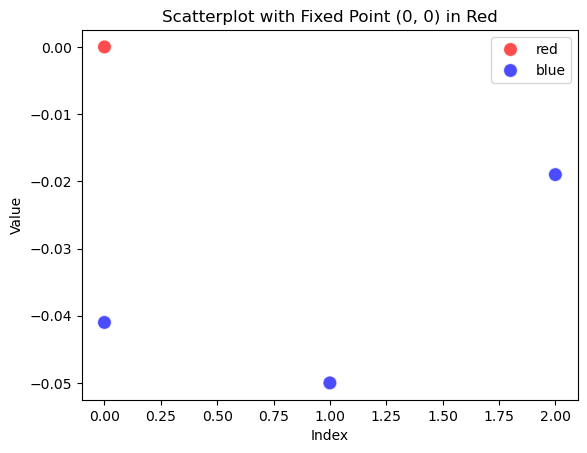

In [ ]:
import pandas as pd
import seaborn as sns  # Import Seaborn for scatterplot
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the filtered values are stored in 'var_decision_near_zero'

# Prepare data for scatterplot
x_data = list(range(len(var_decision_near_zero)))
y_data = var_decision_near_zero

# Create a separate data point for (0, 0) in red
red_point_x = [0]  # X-coordinate for (0, 0)
red_point_y = [0]  # Y-coordinate for (0, 0)
red_point_color = ["red"]  # Color for (0, 0)

# Combine data for the plot
x_data_combined = red_point_x + x_data  # Combine X-coordinates
y_data_combined = red_point_y + y_data  # Combine Y-coordinates
color_data_combined = red_point_color + ["blue"] * len(
    var_decision_near_zero
)  # Combine colors

# Generate the scatterplot with hue and custom color map
sns.scatterplot(
    x=x_data_combined,
    y=y_data_combined,
    hue=color_data_combined,
    palette=["red", "blue"],  # Use a simple 'red' and 'blue' palette
    s=100,  # Adjust marker size as needed
    alpha=0.7,  # Adjust marker transparency as needed
)

# Set axis labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Scatterplot with Fixed Point (0, 0) in Red")

# Show the plot
plt.show()

## Gerando documento

In [ ]:
import pandas as pd
import openpyxl


class ExcelCombiner:
    def __init__(self, path):
        self.wb = openpyxl.load_workbook(path)
        self.ws = self.wb.active

    def combinar_dataframes(self, dataframes, arquivo_excel):
        """
        Combina um array de DataFrames em uma única planilha Excel,
        separando-os por duas linhas em branco.

        Args:
          dataframes: Um array de DataFrames.
          arquivo_excel: O nome do arquivo Excel a ser criado.
        """

        self.wb.create_sheet("Planilha1")
        # Criar um Writer para o arquivo Excel
        writer = pd.ExcelWriter(arquivo_excel, engine="openpyxl")

        # Obter o objeto Workbook do Writer
        workbook = writer.book
        worksheet = workbook[
            "Planilha1"
        ]  # Assumindo que o primeiro DataFrame será escrito na aba 'Sheet1'

        # Escrever os DataFrames em sequência, com separação de linhas
        start_row = 1  # Começar na linha 1
        for i, df in enumerate(dataframes):
            df.to_excel(writer, sheet_name="Sheet1", index=False, startrow=start_row)
            start_row += (
                df.shape[0] + 3
            )  # Adicionar 2 linhas em branco + 1 linha para o cabeçalho do próximo DataFrame

        # Salvar o arquivo Excel
        writer.save()


# Exemplo de uso
df1 = pd.DataFrame({"Coluna 1": [1, 2, 3], "Coluna 2": ["A", "B", "C"]})
df2 = pd.DataFrame({"Coluna 3": [4, 5, 6], "Coluna 4": ["D", "E", "F"]})
df3 = pd.DataFrame({"Coluna 5": [7, 8, 9], "Coluna 6": ["G", "H", "I"]})


display(params)

display(df_consolidado)

# Exibindo o DataFrame
df_resumo = pd.read_excel(
    "./src/assets/output/resultado consolidado/tabela_resumo.xlsx"
)
display(df_resumo)
# Exibir o DataFrame consolidado
dataframes = [df1, df2, df3]
CAMINHO = "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/output/resultado consolidado/planilha_RCE.xlsx"

combinador = ExcelCombiner(CAMINHO)
combinador.combinar_dataframes(dataframes, CAMINHO)